In [74]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib as plt
from matplotlib import pyplot

In [18]:
class BernoulliBandit :
    def __init__ (self , means):
        for i in means:
            assert(i <= 1 and i >= 0)
        self.means = means
        self.k = len(means)
        self.best_mean = max(means)
        self.regret = 0
# Function should return the number of arms
    def get_K( self ):
         return self.k
# Accepts a parameter 0 <= a <= K -1 and returns the
# realisation of random variable X with P(X = 1) being
# the mean of the (a +1) th arm .
    def pull (self , a):
        self.regret += (self.best_mean - self.means[a])
        return bernoulli.rvs(self.means[a], size=1)

    def get_regret ( self ):
        return self.regret

In [38]:
def ETC(n, m, bandit):
    k = bandit.k
    rewards= np.zeros(n)
    total_reward=0
    actions = np.zeros(n)
    for i in range(n):
        if(i<= m*k - 1):
            rewards[i] = bandit.pull(i%k)
            total_reward += rewards[i]
            actions[i] = i%k
        else: 
            if(i == m*k): ##optimization
                best_mean_index = np.argmax(np.mean(np.transpose(np.reshape(rewards[0:m*k], (m,k))),1))
            actions[i] = best_mean_index
            rewards[i] = bandit.pull(best_mean_index)
            total_reward += rewards[i]
    observed_random_regret = n * bandit.best_mean - total_reward
    return np.array([(i,j) for (i,j) in zip(actions,rewards)]), observed_random_regret

In [93]:
bandit = BernoulliBandit([0.3,0.6,0.9])
ETC(100,5,bandit)[0][0:20]

array([[0., 0.],
       [1., 0.],
       [2., 1.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [0., 1.],
       [1., 0.],
       [2., 1.],
       [0., 0.],
       [1., 0.],
       [2., 1.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 0.],
       [2., 1.]])

In [90]:
trials = 100
horizon = 500
mean_regrets = np.zeros(50)
for m in range(2,101,2): ## m = [2,4,...,50]
    for i in range(trials):
        bandit= BernoulliBandit([0.5,0.6,0.7])
        results, observed_random_regret = ETC(horizon,m,bandit)
        mean_regrets[int(m/2) - 1] = (mean_regrets[int(m/2) - 1] * i + bandit.get_regret())/(i+1) 

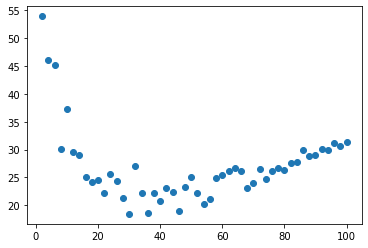

In [91]:
pyplot.scatter(range(2,101,2), mean_regrets)

# Exercises

## 6.1
$\hat{\mu}_i(mk) = \frac{1}{T_i(mk)}\sum^{mk}_{s=1}\mathbb{1}(A_s=1)X_s$
By the canonical model, every non-zero term in the sum is drawn from $\mathbb{P}_{A_i}(.)$ distribution which is 1-subgaussian. And by the algorithm there are m non-zero terms.
show that $\frac{1}{m}(\sum^m_1X_t + \sum^m_1X_1)$ is $\sqrt{\frac{2}{m}}-subgaussian$.
How to deal with the added constant?

## 6.2
### Case 1:
$\Delta \leq \frac{1}{\sqrt{n}}$:

$R_n \leq n\Delta \leq \sqrt{n}$

### Case 2:
$\Delta \geq \frac{1}{\sqrt{n}}$:

$R_n \leq \Delta + \frac{4}{\Delta}\Bigl(1+max\{0, log(\frac{n\Delta^2}{4})\}\Bigr)$

$R_n \leq \Delta + 4\sqrt{n} + \max_{\Delta'>0}\frac{4}{\Delta'}log(\frac{n\Delta'^2}{4})$

Finding the first derivative for the right-most term and equating to 0:

$\frac{8}{\Delta'^2}-\frac{4}{\Delta'^2}log(\frac{n\Delta'^2}{4}) = 0$

Evaluting, we get $\Delta' = \frac{2e}{\sqrt{n}}$

Can check that the second derivate is negative.

Substituting, we get:

$R_n \leq \Delta + 4\sqrt{n} + \frac{4\sqrt{n}}{e} \leq \Delta + (4+\frac{4}{e})\sqrt{n}$


# 6.3

Assuming that n>2m, and let $\Delta_2$ be the suboptimality gap of the suboptimal arm, we have that:

$\mathbb{P}(T_2(n)>m) \leq \mathbb{P}(\hat{\mu}_2(2m) - \hat{\mu_2} + \mu_1 - \mu_2 \geq \Delta_2) \leq exp(-\frac{m\Delta^2}{4})$ as seen before.

Setting $m = \frac{4}{\Delta^2}log(\frac{1}{\delta})$ would yield:

$\mathbb{P}(T_2(n) >m) \leq \delta$

We thus have the bound on the pseudo-regret with probability 1-$\delta$:

$\bar{R}_n \leq m\Delta_2 = \frac{4}{\Delta_2}log(\frac{1}{\delta})$


# 6.4

We need:
$\mathbb{P}(n\mu^*-\sum^n_{t=1}X_t \leq \epsilon) = 1- \delta$
We have that:

$\mathbb{P}(n\mu^*-\sum^n_{t=1}X_t \leq \epsilon) = \mathbb{P}(\sum^n_{t=1}X_t - n\mu^* \geq -\epsilon) \leq exp(-\frac{(\epsilon)^2}{2n})$ 

Since $\sum^n_{t=1}X_t - n\mu^*$ is $\sqrt{n}-subgaussian$.

setting $\epsilon = \sqrt{2nlog(\frac{1}{1-\delta})}$ will give us the bound:
$R_n < \sqrt{2nlog(\frac{1}{1-\delta})}$ with probability $1-\delta$

We conclude that the $1-\delta$-probaility bound for the random regret is in O($\sqrt{n}$) whereas for the pseudo-regret, it is in O(1). 